In [1]:
from cleanlab.filter_copy import find_label_issues_bench

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
def normalize(arr): 
    normalized = np.zeros(arr.shape, dtype=np.float16) 
    for i, a in enumerate(arr): 
        normalized[i] = a / np.sum(a) 
    return normalized 

In [30]:
m = 5000
n = 50000

In [31]:
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 

In [32]:
nt = 9
ncores = 10
time_ints = np.zeros((9, 10))

In [33]:
for n_jobs in range(10):
    print(f"njob {n_jobs}")
    _, times = find_label_issues_bench(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1)
    time_ints[:, n_jobs] = times

njob 0
njob 1
njob 2
njob 3
njob 4
njob 5
njob 6
njob 7
njob 8
njob 9


In [34]:
time_totals = np.sum(time_ints, axis=0)

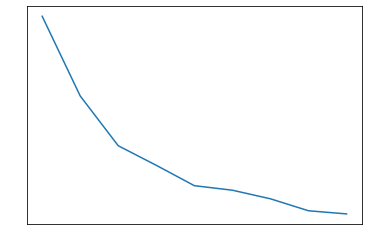

In [38]:
plt.plot(time_totals[1:])
plt.tick_params(colors='w')

In [11]:
time_ints[3,0]

1.0967254638671875e-05

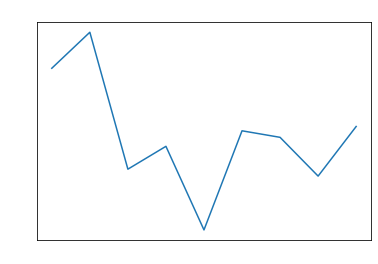

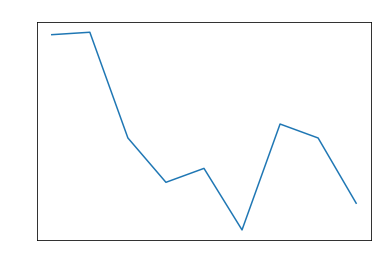

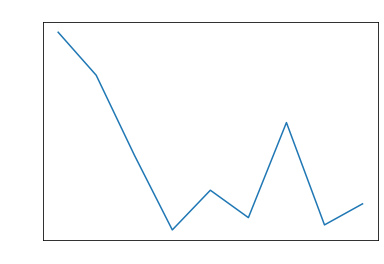

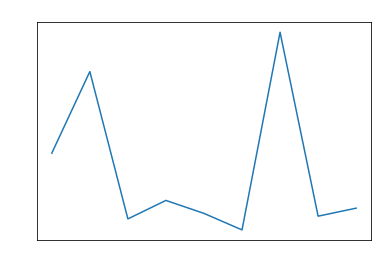

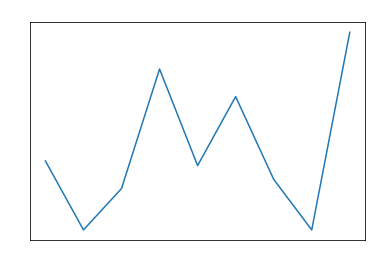

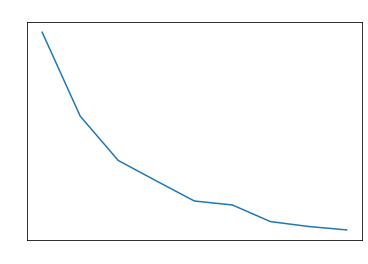

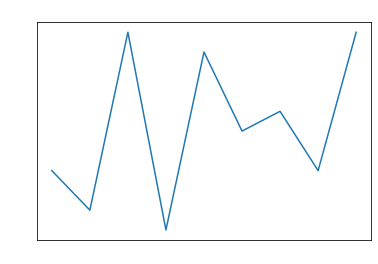

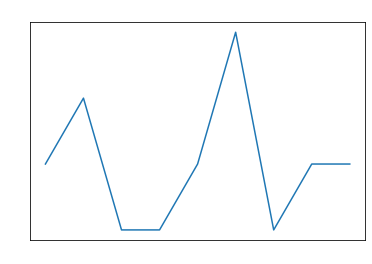

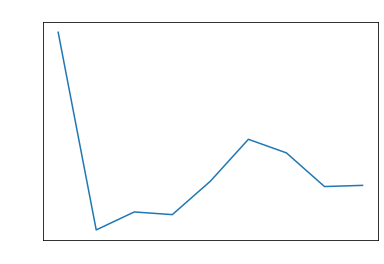

In [37]:
for i in range(nt):
    plt.plot(2+np.arange(ncores-1), time_ints[i,1:])
    plt.title(f"time int {i}", c='w')
    plt.tick_params(colors='w')
    plt.show()

In [18]:
print(f"checks took {times[0]}")
print(f"calculate confident joint took {times[1]}")
print(f"preproc took {times[2]}")
print(f"prune by class took {times[3]}")
print(f"prune by count took {times[4]}")
print(f"fin conf learn took {times[5]}")
print(f"pre neq took {times[6]}")
print(f"final checks took {times[7]}")

checks took 0.3423280715942383
calculate confident joint took 0.8540129661560059
preproc took 0.2468421459197998
prune by class took 1.4066696166992188e-05
prune by count took 47.77558088302612
fin conf learn took 1.3113021850585938e-05
pre neq took 9.5367431640625e-07
final checks took 0.16227483749389648
